In [1]:
#Libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # to do the grid of plots

In [6]:
df = pd.read_csv('creditcard.csv')

In [7]:
df = df[df.Amount < 10000]

In [8]:
# Reason: robust scaler is immune to outliers, as median is chosen as the central tendancy.
from sklearn.preprocessing import StandardScaler, RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df = df[['scaled_time','scaled_amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Class']]

In [9]:
fraud = df[df.Class == 1].sample(frac=1, random_state=42)
nonfraud = df[df.Class == 0].sample(frac=1, random_state=42)

In [10]:
fraud_cnt = len(fraud)
nonfraud_cnt = len(nonfraud)

fraud_1_5 = fraud [: fraud_cnt//5]
fraud_4_5 = fraud [(fraud_cnt//5)+1 : fraud_cnt]

nonfraud_1_5 = nonfraud [: nonfraud_cnt//5]
nonfraud_4_5 = nonfraud [(nonfraud_cnt//5)+1 : nonfraud_cnt]

In [17]:
credit_card_1_5 = pd.concat([nonfraud_1_5 , fraud_1_5])
credit_card_4_5 = pd.concat([nonfraud_4_5 , fraud_4_5])

In [18]:
credit_card_1_5.to_csv("credit_card_1_5.csv")
credit_card_4_5.to_csv("credit_card_4_5.csv")

In [19]:
df = credit_card_4_5

In [21]:
fraud = df[df.Class == 1]
nonfraud = df[df.Class == 0]

In [24]:
X_fraud = fraud.drop('Class', axis=1)

In [25]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [27]:
X_test = credit_card_1_5.drop('Class',axis=1)
y_test = credit_card_1_5['Class']

D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[[45650 11211]
 [   10    88]]
0.802998648150424
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     56861
           1       0.01      0.90      0.02        98

   micro avg       0.80      0.80      0.80     56959
   macro avg       0.50      0.85      0.45     56959
weighted avg       1.00      0.80      0.89     56959

Total number of Transactions classified as Fraudulent:  11299
Number of Fraudulent Transactions classified as Non-fraudulent:  10 out of 98


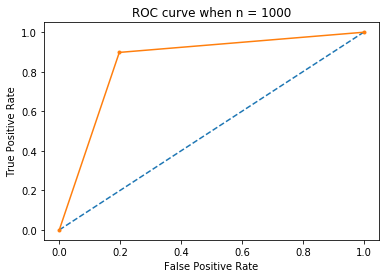

In [35]:
nonfraud_sample = nonfraud.sample(n=1000)
df_outlier=pd.concat([fraud,nonfraud_sample])
X_train = df_outlier.drop('Class', axis=1)
y_train = df_outlier['Class']

state = 1
outlier_fraction = len(fraud)/float(len(nonfraud_sample))

clf = IsolationForest(max_samples=len(X_train), contamination = outlier_fraction, random_state = state)
clf.fit(X_train)
y_pred = clf.predict(X_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_pred = pd.DataFrame(y_pred)

mat = confusion_matrix(y_test,y_pred)
print(mat)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Total number of Transactions classified as Fraudulent: ", mat[1][1]+mat[0][1])
print("Number of Fraudulent Transactions classified as Non-fraudulent: ", mat[1][0], "out of 98")

from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve when n = 1000')
# show the plot
pyplot.show()

D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[[56651   210]
 [   53    45]]
0.9953826436559631
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.18      0.46      0.25        98

   micro avg       1.00      1.00      1.00     56959
   macro avg       0.59      0.73      0.63     56959
weighted avg       1.00      1.00      1.00     56959

Total number of Transactions classified as Fraudulent:  255
Number of Fraudulent Transactions classified as Non-fraudulent:  53 out of 98


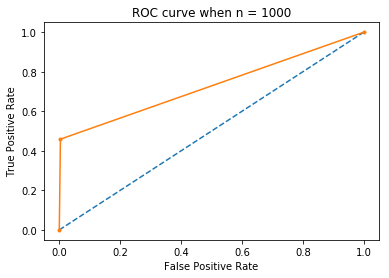

In [34]:
nonfraud_sample = nonfraud.sample(n=45000)
df_outlier=pd.concat([fraud,nonfraud_sample])
X_train = df_outlier.drop('Class', axis=1)
y_train = df_outlier['Class']

state = 1
outlier_fraction = len(fraud)/float(len(nonfraud_sample))

clf = IsolationForest(max_samples=len(X_train), contamination = outlier_fraction, random_state = state)
clf.fit(X_train)
y_pred = clf.predict(X_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_pred = pd.DataFrame(y_pred)

mat = confusion_matrix(y_test,y_pred)
print(mat)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Total number of Transactions classified as Fraudulent: ", mat[1][1]+mat[0][1])
print("Number of Fraudulent Transactions classified as Non-fraudulent: ", mat[1][0], "out of 98")

from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve when n = 1000')
# show the plot
pyplot.show()

D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[[55300  1561]
 [   26    72]]
0.9721378535437771
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56861
           1       0.04      0.73      0.08        98

   micro avg       0.97      0.97      0.97     56959
   macro avg       0.52      0.85      0.53     56959
weighted avg       1.00      0.97      0.98     56959

Total number of Transactions classified as Fraudulent:  1633
Number of Fraudulent Transactions classified as Non-fraudulent:  26 out of 98


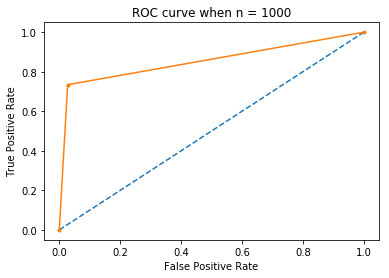

In [33]:
nonfraud_sample = nonfraud.sample(n=5000)
df_outlier=pd.concat([fraud,nonfraud_sample])
X_train = df_outlier.drop('Class', axis=1)
y_train = df_outlier['Class']

state = 1
outlier_fraction = len(fraud)/float(len(nonfraud_sample))

clf = IsolationForest(max_samples=len(X_train), contamination = outlier_fraction, random_state = state)
clf.fit(X_train)
y_pred = clf.predict(X_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_pred = pd.DataFrame(y_pred)

mat = confusion_matrix(y_test,y_pred)
print(mat)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Total number of Transactions classified as Fraudulent: ", mat[1][1]+mat[0][1])
print("Number of Fraudulent Transactions classified as Non-fraudulent: ", mat[1][0], "out of 98")

from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve when n = 1000')
# show the plot
pyplot.show()